C:\Users\TimPr\AppData\Local\Temp\ipykernel_13104\1021759028.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_mape_sorted['Model'], rotation=45, ha='right', fontsize=12)
C:\Users\TimPr\AppData\Local\Temp\ipykernel_13104\1021759028.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_mae_sorted['Model'], rotation=45, ha='right', fontsize=12)


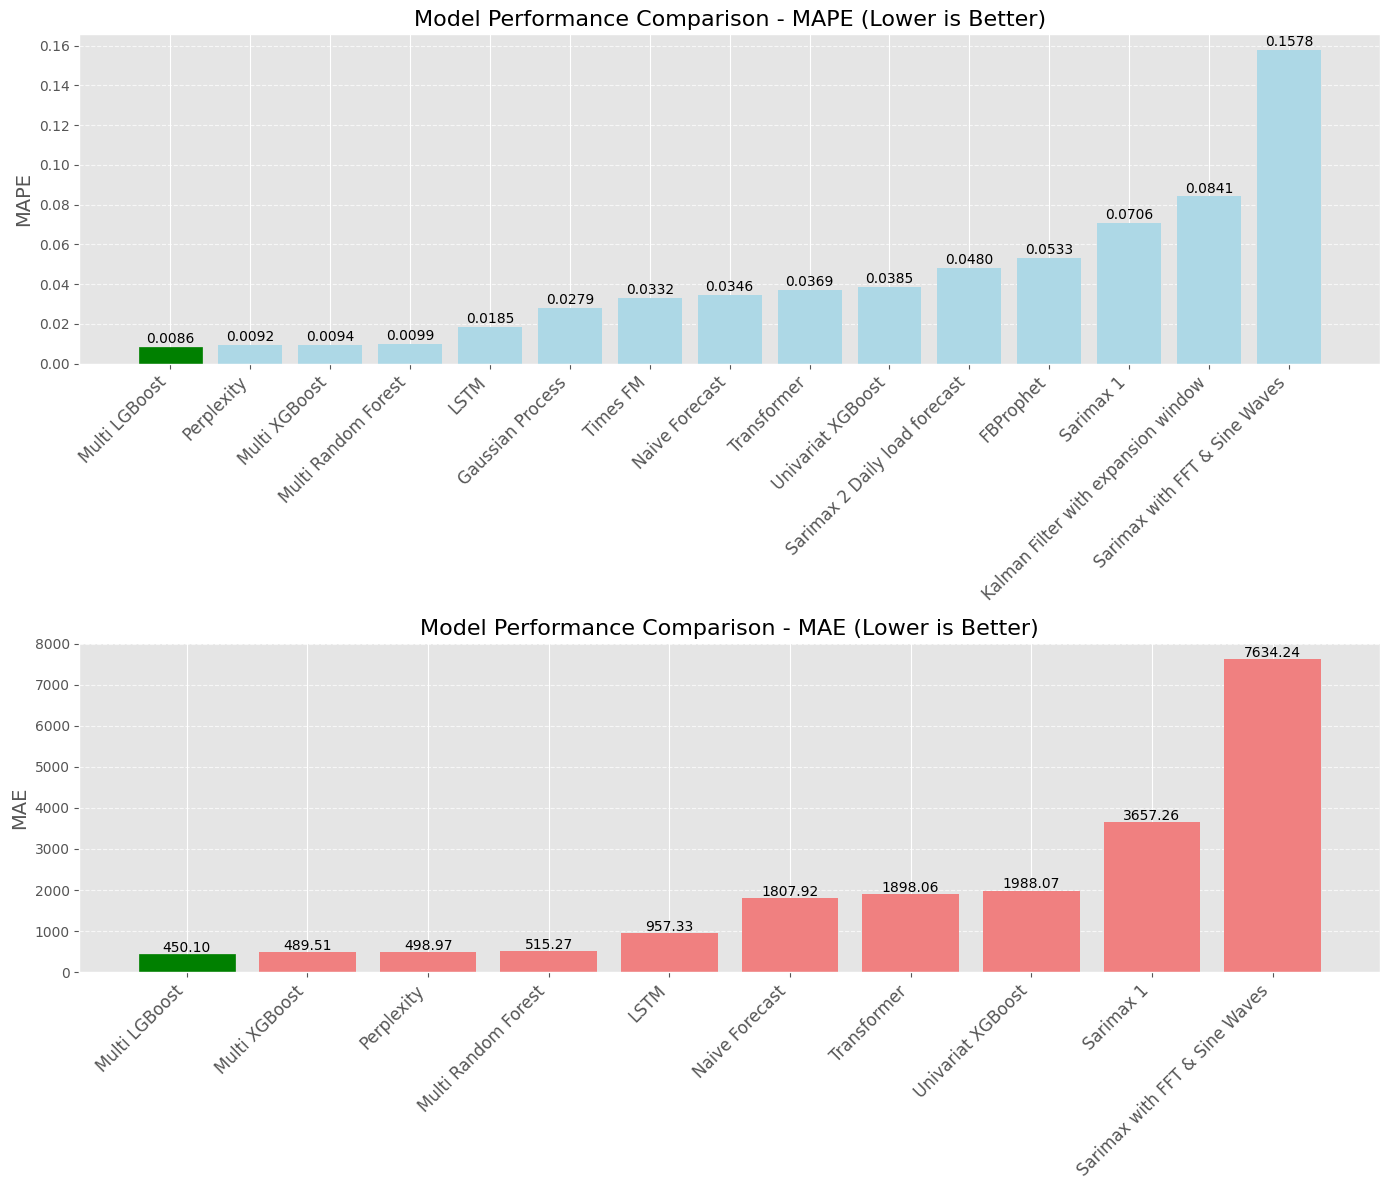

Best model by MAPE: Multi LGBoost with MAPE of 0.0086
Best model by MAE: Multi LGBoost with MAE of 450.10


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create DataFrame from the data
data = {
    'Model': [
        'Naive Forecast', 'Sarimax 1', 'FBProphet', 'LSTM', 'Univariat XGBoost',
        'Multi XGBoost', 'Multi LGBoost', 'Multi Random Forest', 'Transformer',
        'Sarimax with FFT & Sine Waves', 'Sarimax 2 Daily load forecast',
        'Kalman Filter with expansion window', 'Gaussian Process', 'Times FM', 'Perplexity'
    ],
    'MAPE': [
        0.034592, 0.0706, 0.053319, 0.0185, 0.038462,
        0.0094, 0.0086, 0.0099, 0.0369, 0.1578,
        0.048, 0.0841, 0.02795, 0.0332, 0.0092
    ],
    'MAE': [
        1807.92, 3657.26, None, 957.33, 1988.07,
        489.51, 450.10, 515.27, 1898.06, 7634.24,
        None, None, None, None, 498.97
    ]
}

df = pd.DataFrame(data)

# Remove parentheses for Gaussian Process MAPE
df.loc[df['Model'] == 'Gaussian Process', 'MAPE'] = 0.02795

# Sort by MAPE for MAPE plot
df_mape_sorted = df.sort_values('MAPE')

# Sort by MAE for MAE plot (excluding None values)
df_mae = df[df['MAE'].notna()]
df_mae_sorted = df_mae.sort_values('MAE')

# Find the best models
best_mape_model = df_mape_sorted.iloc[0]['Model']
best_mae_model = df_mae_sorted.iloc[0]['Model']

# Set up the style
plt.style.use('ggplot')
sns.set_palette("Paired")

# Create the visualizations
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot for MAPE
bars = axes[0].bar(df_mape_sorted['Model'], df_mape_sorted['MAPE'], color='lightblue')
# Highlight the best MAPE
best_index = list(df_mape_sorted['Model']).index(best_mape_model)
bars[best_index].set_color('green')

axes[0].set_title('Model Performance Comparison - MAPE (Lower is Better)', fontsize=16)
axes[0].set_ylabel('MAPE', fontsize=14)
axes[0].set_xticklabels(df_mape_sorted['Model'], rotation=45, ha='right', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations on top of the bars
for i, v in enumerate(df_mape_sorted['MAPE']):
    axes[0].text(i, v + 0.002, f'{v:.4f}', ha='center', fontsize=10)

# # Add highlight annotation for best MAPE
# axes[0].annotate(f'Best MAPE: {df_mape_sorted.iloc[0]["MAPE"]:.4f}',
#                 xy=(best_index, df_mape_sorted.iloc[0]['MAPE']),
#                 xytext=(best_index, df_mape_sorted.iloc[0]['MAPE'] + 0.02),
#                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
#                 ha='center', fontsize=12, fontweight='bold')

# Plot for MAE
bars = axes[1].bar(df_mae_sorted['Model'], df_mae_sorted['MAE'], color='lightcoral')
# Highlight the best MAE
best_index = list(df_mae_sorted['Model']).index(best_mae_model)
bars[best_index].set_color('green')

axes[1].set_title('Model Performance Comparison - MAE (Lower is Better)', fontsize=16)
axes[1].set_ylabel('MAE', fontsize=14)
axes[1].set_xticklabels(df_mae_sorted['Model'], rotation=45, ha='right', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations on top of the bars
for i, v in enumerate(df_mae_sorted['MAE']):
    axes[1].text(i, v + 50, f'{v:.2f}', ha='center', fontsize=10)

# Add highlight annotation for best MAE
# axes[1].annotate(f'Best MAE: {df_mae_sorted.iloc[0]["MAE"]:.2f}',
#                 xy=(best_index, df_mae_sorted.iloc[0]['MAE']),
#                 xytext=(best_index, df_mae_sorted.iloc[0]['MAE'] + 800),
#                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
#                 ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print a summary of the best performing models
print(f"Best model by MAPE: {best_mape_model} with MAPE of {df_mape_sorted.iloc[0]['MAPE']:.4f}")
print(f"Best model by MAE: {best_mae_model} with MAE of {df_mae_sorted.iloc[0]['MAE']:.2f}")